In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [5]:
house_size = np.array([12.0, 14.0, 20.0, 20.0, 22.0, 30.0, 31.0, 40.0, 41.0])
house_price = np.array([90.0, 89.0, 92.0, 90.0, 100.0, 110.0, 105.0, 150.0, 140.0])

In [6]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        yHat = w * x[i] + b
        cost += (yHat - y[i])**2

    total_cost = (1/2*m)*cost
    return total_cost

In [7]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0
    for i in range(m):
        cost = (((w*x[i]) + b) - y[i])
        dj_dw += cost * x[i]
        dj_db += cost

    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

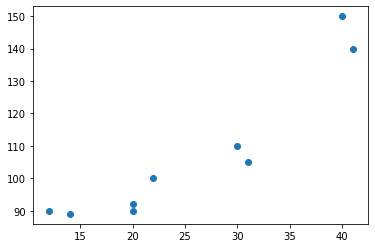

In [8]:
plt.scatter(house_size, house_price)

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    j_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        j_history.append(cost_function(x, y, w, b))
        p_history.append([w,b])
        
        if i % 10000 == 0:
            print(f"iteration {i}: cost {j_history[-1]:0.2e} dj_dw:{dj_dw:0.3e}, dj_db:{dj_db:0.3e}, w:{w:0.3e}, b:{b:0.5e}")

    return w, b, j_history, p_history

In [10]:
w_init = 0
b_init = 0
iterations = 100000
tmp_alpha = 0.001

w_final, b_final, J_hist, p_hist = gradient_descent(house_size ,house_price, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")
print(f"w:{w_final}, b:{b_final}")

iteration 0: cost 4.79e+04 dj_dw:-2.940e+03, dj_db:-1.073e+02, w:2.940e+00, b:1.07333e-01
iteration 10000: cost 3.83e+03 dj_dw:6.745e-02, dj_db:-1.984e+00, w:2.512e+00, b:4.11549e+01
iteration 20000: cost 2.71e+03 dj_dw:1.818e-02, dj_db:-5.346e-01, w:2.136e+00, b:5.22066e+01
iteration 30000: cost 2.62e+03 dj_dw:4.898e-03, dj_db:-1.440e-01, w:2.035e+00, b:5.51845e+01
iteration 40000: cost 2.62e+03 dj_dw:1.320e-03, dj_db:-3.882e-02, w:2.008e+00, b:5.59870e+01
iteration 50000: cost 2.62e+03 dj_dw:3.556e-04, dj_db:-1.046e-02, w:2.000e+00, b:5.62032e+01
iteration 60000: cost 2.62e+03 dj_dw:9.582e-05, dj_db:-2.818e-03, w:1.998e+00, b:5.62615e+01
iteration 70000: cost 2.62e+03 dj_dw:2.582e-05, dj_db:-7.594e-04, w:1.998e+00, b:5.62772e+01
iteration 80000: cost 2.62e+03 dj_dw:6.957e-06, dj_db:-2.046e-04, w:1.998e+00, b:5.62814e+01
iteration 90000: cost 2.62e+03 dj_dw:1.875e-06, dj_db:-5.514e-05, w:1.998e+00, b:5.62825e+01
(w,b) found by gradient descent: (  1.9976, 56.2828)
w:1.9976270698007166

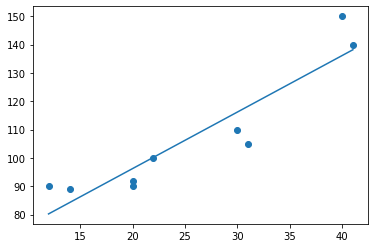

In [11]:
def linear_func(m, x, b):
    return m*x + b

yhats = linear_func(w_final, house_size, b_final)
plt.plot(house_size, yhats)
plt.scatter(house_size, house_price)